In [49]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data points
X = np.array([6, 3]).reshape(-1, 1)  # Lyft's take
Y = np.array([0.60, 0.93])           # Match rate

# Fit the linear regression model
model = LinearRegression().fit(X, Y)

# Get the slope and y-intercept
slope = model.coef_[0]
intercept = model.intercept_

print("Slope (m):", slope)
print("Intercept (c):", intercept)

Slope (m): -0.11000000000000001
Intercept (c): 1.26


,Lyft_take,Total_rides,Net_revenue
0,1,7200.0,-27800.0
1,1,8400.0,-26600.0
2,1,9600.0,-25400.0
3,1,10800.0,-24200.0
4,1,12000.0,-23000.0
...,...,...,...
67,6,15600.0,-19400.0
68,6,16800.0,-18200.0
69,6,18000.0,-17000.0
70,6,19200.0,-15800.0


In [45]:
# Define the values of X (Lyft's take)
X_values = [2, 3, 4, 5, 6]

# Define the assumptions
rides_jan_2024 = 12000
new_riders_per_month = 2000
new_drivers_per_month = 10
ride_match_rates = {6: 0.60, 5: 0.71, 4: 0.82, 3: 0.93, 2: 1}

# Define a function to calculate the match rate based on the value of X
def calculate_match_rate(X):
    if X in ride_match_rates:
        return ride_match_rates[X]
    else:
        return -0.11 * X + 1.26

# Define a function to calculate the metrics for each month for each X value
def calculate_metrics_for_X(X):
    df_X = pd.DataFrame(columns=['Month', 'Riders', 'CAC_new_riders', 'Rider_churn', 'Final_riders', 'CAC_new_drivers', 'Total_rides', 'Lyft\'s take', 'Match_rate', 'Net_revenue'])

    riders = rides_jan_2024
    for month in range(1, 13):
        # Calculate match rate
        match_rate = calculate_match_rate(X)
        
        # Calculate metrics
        CAC_new_riders = new_riders_per_month * 15
        rider_churn = (riders * match_rate * 0.10) + (riders * (1 - match_rate) * 0.33)
        final_riders = riders - rider_churn
        CAC_new_drivers = new_drivers_per_month * 500
        total_rides = final_riders * match_rate
        net_revenue = total_rides * X - CAC_new_riders - CAC_new_drivers
        
        # Append to dataframe
        df_X.loc[len(df_X)] = [f'Month-{month}-24', riders, CAC_new_riders, rider_churn, final_riders, CAC_new_drivers, total_rides, X, match_rate, net_revenue]
        
        # Update riders for next month
        riders = final_riders + new_riders_per_month

    return df_X

# Create dataframes for each X value
dfs = []
for X in X_values:
    df_X = calculate_metrics_for_X(X)
    dfs.append(df_X)

# Concatenate dataframes for each X value
df_final = pd.concat(dfs, ignore_index=True)

# Display the final dataframe
#df_final

total_yearly_net_revenue = df_final.groupby('Lyft\'s take').sum()['Net_revenue']

# Display the total yearly net revenue for each X value
total_yearly_net_revenue

# Convert the series to a dataframe
df_total_net_revenue = total_yearly_net_revenue.reset_index()

df_total_net_revenue = df_total_net_revenue.astype({'Lyft\'s take': 'int', 'Net_revenue': 'int'})

# Display the dataframe
df_total_net_revenue

,Lyft's take,Net_revenue
0,2,-91330
1,3,4015
2,4,22146
3,5,5935
4,6,-34269


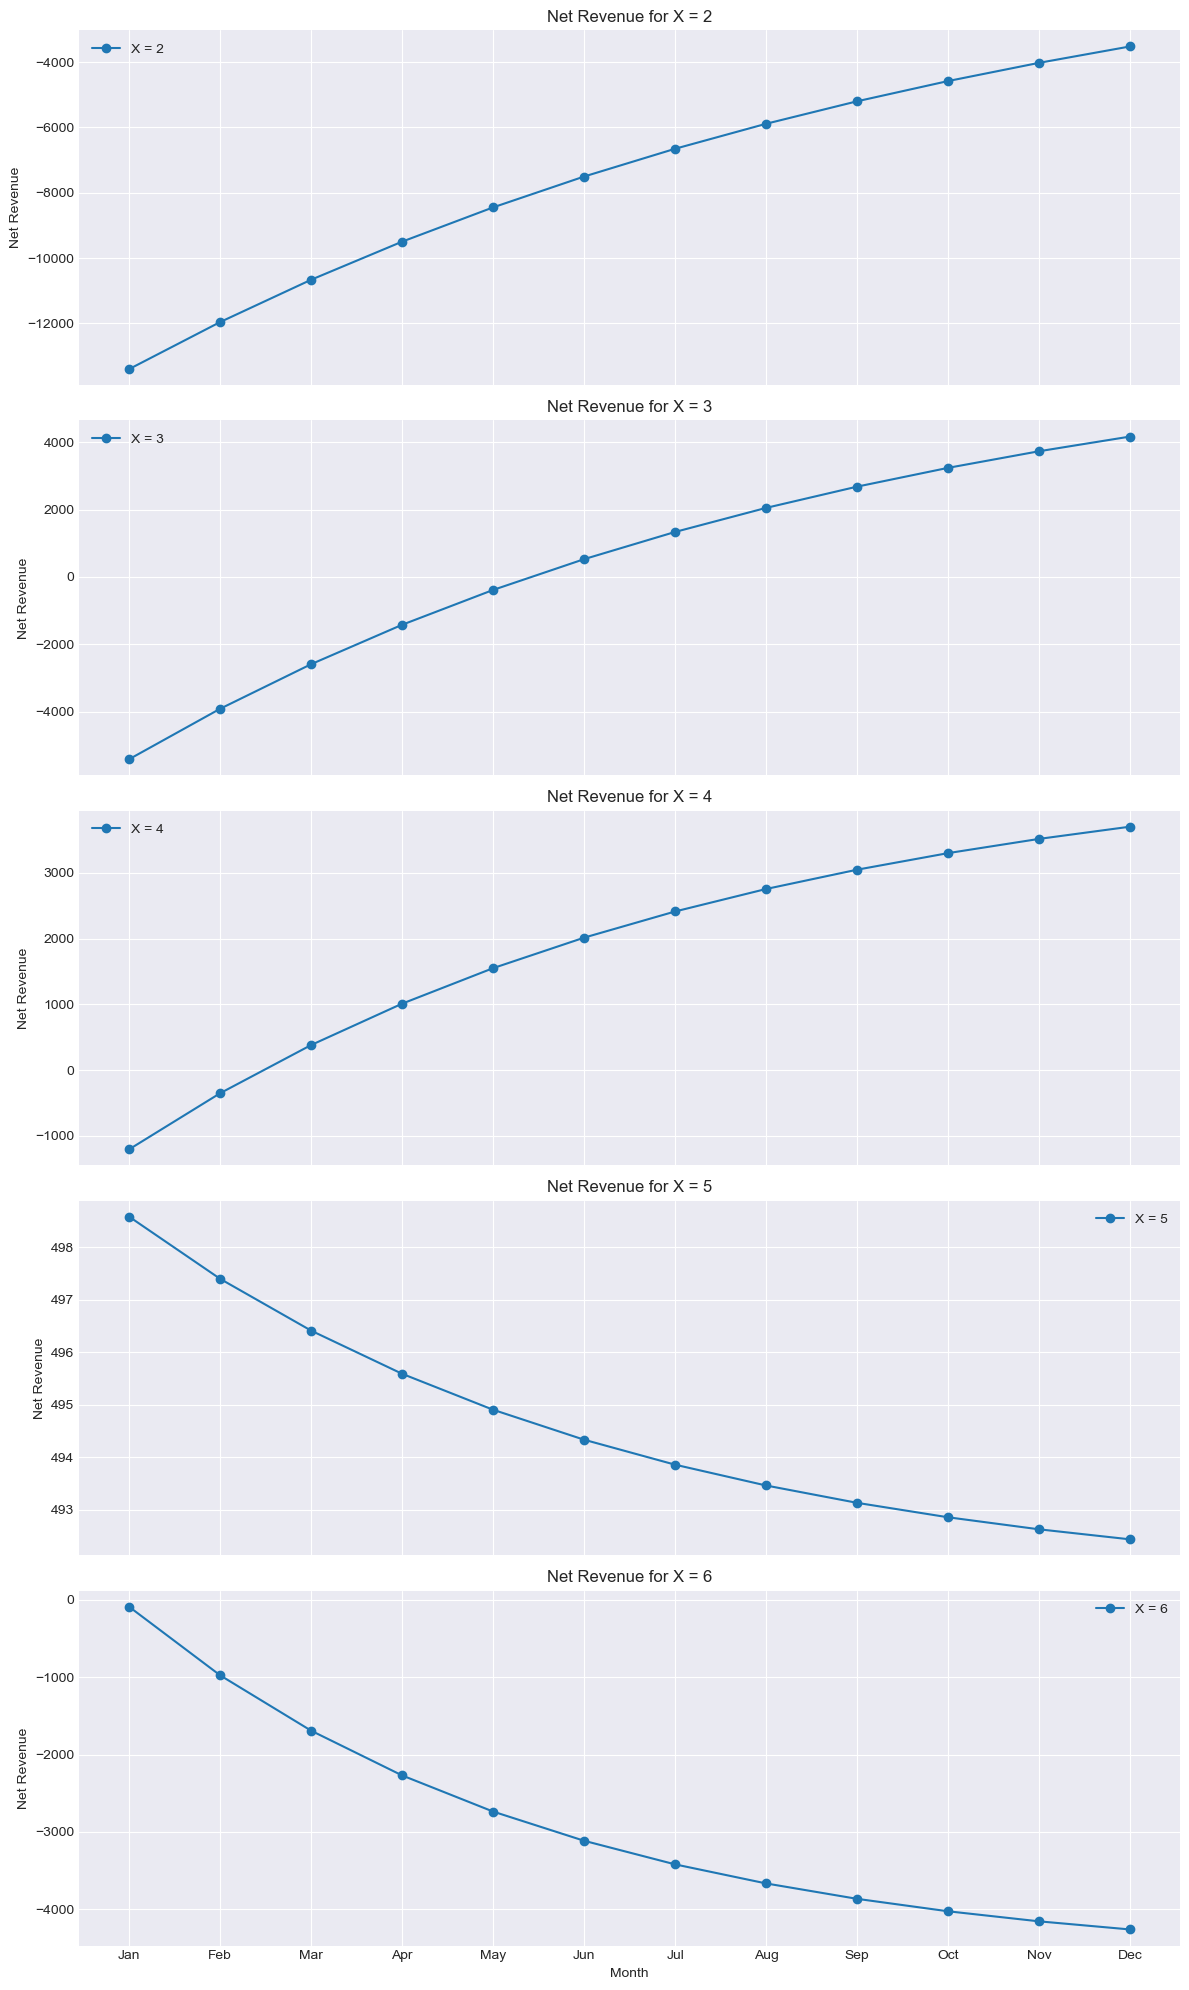

In [59]:
# Set the seaborn style
sns.set_style('darkgrid')

# Create a figure and axis objects
fig, axs = plt.subplots(5, 1, figsize=(12, 20), sharex=True)

# Define month names
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Iterate through X values
for i, X in enumerate(X_values):
    # Filter dataframe for current X value
    df_X = df_final[df_final["Lyft's take"] == X]
    
    # Plot the line graph for Net Revenue
    axs[i].plot(month_names, df_X['Net_revenue'], marker='o', linestyle='-', label=f'X = {X}')
    
    # Set labels and title
    axs[i].set_ylabel('Net Revenue')
    axs[i].set_title(f'Net Revenue for X = {X}')
    
    # Add legend
    axs[i].legend()

# Set common xlabel
axs[-1].set_xlabel('Month')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()